In [ ]:
## A Simple Example

import gym

n_episode = 20
env = gym.make("CartPole-v0")
#env.monitor.start('/tmp/RL/cartpole-experiment-1')
observation = env.reset()

for i in range(n_episode):
    for t in range(1000):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
            
#env.monitor.close()
#gym.upload('/tmp/RL/cartpole-experiment-1', API_KEY)

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


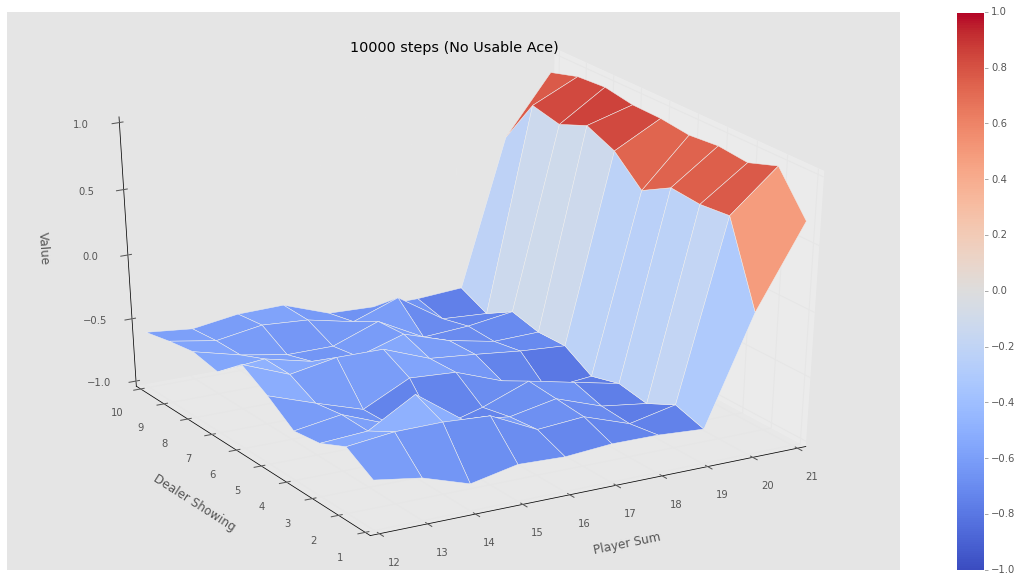

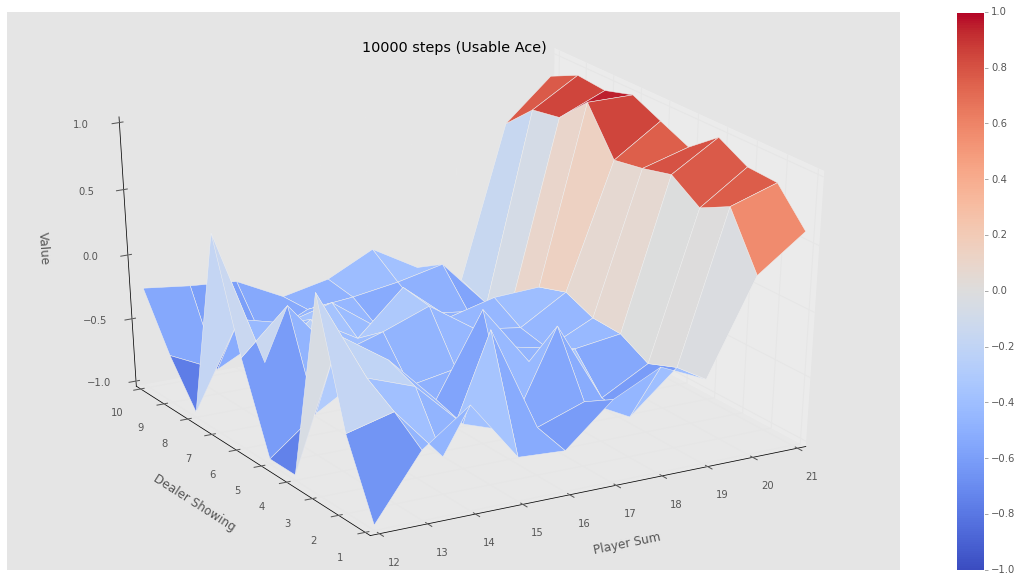

In [10]:
## Monte Carlo Prediction
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
from blackjack import BlackjackEnv
import plotting

matplotlib.style.use('ggplot')

env = BlackjackEnv()

def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # the final value function
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes+1):
        episode = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, done, info = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
            
        states_in_episode = set([tuple(x[0]) for x in episode])
        for state in states_in_episode:
            # Find the first occurance of the state in the episode
            first_occurence_idx = next(i for i, x in enumerate(episode) if x[0] == state)
            G = sum([x[2]*(discount_factor**i) for i, x in enumerate(episode[first_occurence_idx:])])
            
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]
    return V       

def sample_policy(state):
    score, dealer_score, usable_ace = state
    return 0 if score >= 20 else 1

vv = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(vv, title="10000 steps")